In [1]:

!pip install pandas numpy matplotlib seaborn plotly --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


In [2]:

df = pd.read_csv("Netflix Dataset.csv")

print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.info()
df.head(3)


Shape of dataset: (7789, 11)

Column names: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [4]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()

# --- Check missing values ---
df.isnull().sum()

# --- Handle missing values (optional cleanup) ---
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Not Available', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Release_Date'].fillna('Unknown', inplace=True)

# --- Convert date to datetime format ---
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# --- Extract year for analysis ---
df['Year_Added'] = df['Release_Date'].dt.year

# --- Preview cleaned data ---
df.head()

/tmp/ipython-input-2169103389.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2169103389.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year_Added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [5]:

print("Total Movies:", sum(df['Type'] == 'Movie'))
print("Total TV Shows:", sum(df['Type'] == 'TV Show'))


top_countries = df['Country'].value_counts().head(10)
print(top_countries)

yearly_trend = df['Year_Added'].value_counts().sort_index()
yearly_trend


Total Movies: 0
Total TV Shows: 0
Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64


,count
Year_Added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,24
2015.0,79
2016.0,432


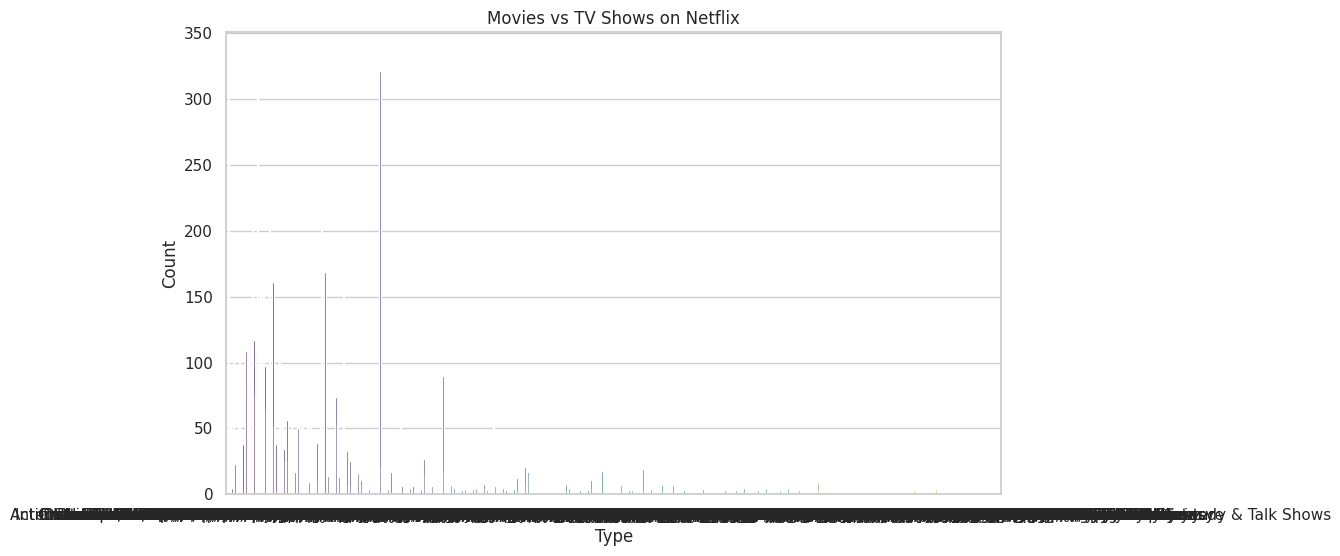

In [9]:
sns.countplot(data=df, x='Type', palette='viridis')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

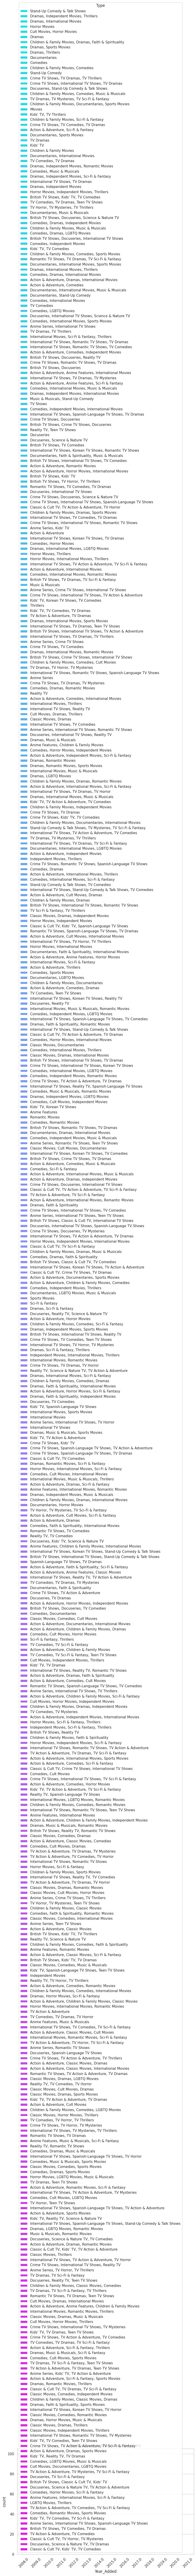

In [10]:
sns.countplot(data=df, x='Year_Added', hue='Type', palette='cool')
plt.title('Netflix Content Added Over the Years')
plt.xticks(rotation=45)
plt.show()


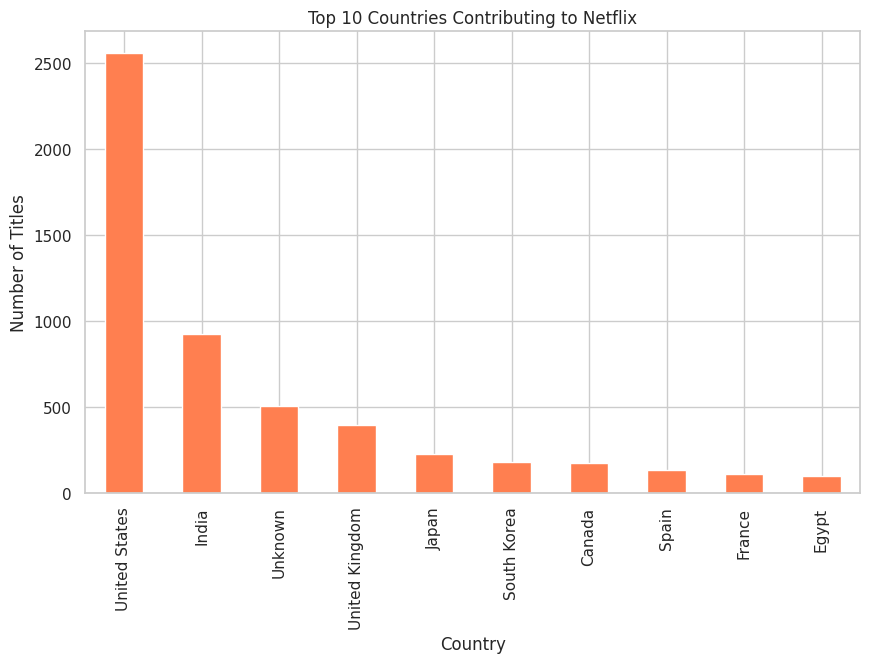

In [11]:
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries Contributing to Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


/tmp/ipython-input-878755567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


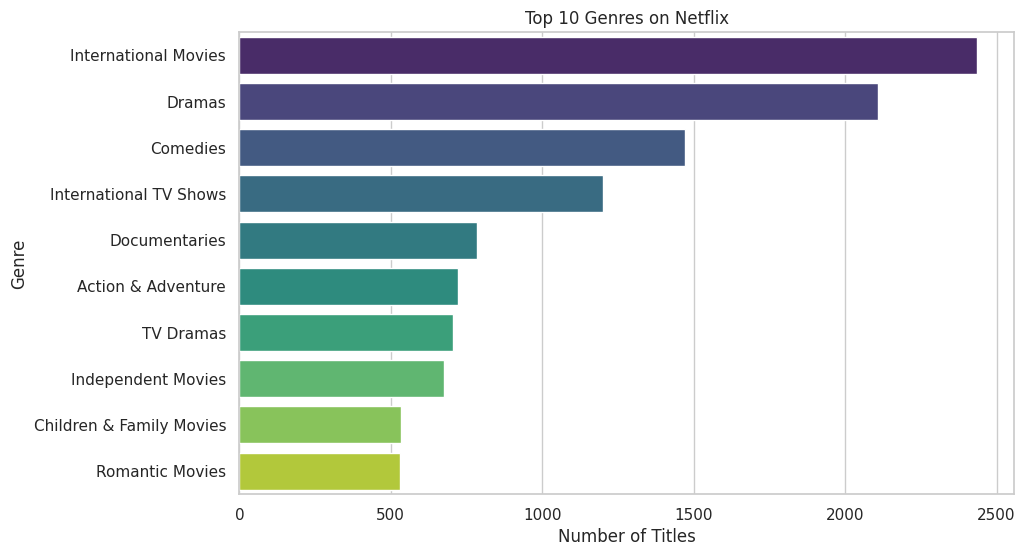

In [13]:
# Split and explode Genre column (if named "Listed_In")
genre_df = df.assign(Genre=df['Type'].str.split(', ')).explode('Genre')

top_genres = genre_df['Genre'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [23]:
# --- Filter by type ---
movies = df[df['Type'] == 'Movie']
tv_shows = df[df['Type'] == 'TV Show']

# --- Filter by country ---
india_content = df[df['Country'].str.contains('India', na=False)]

# --- Filter by genre ---
action_movies = df[df['Type'].str.contains('Action', na=False)]

# --- Filter by release year ---
recent_releases = df[df['Year_Added'] >= 2020]

# --- Combine filters (example) ---
india_action = df[
    (df['Country'].str.contains('India', na=False)) &
    (df['Type'].str.contains('Action', na=False)) &
    (df['Type'] == 'Movie')
]

india_action.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year_Added


In [24]:
# --- Interactive year trend ---
fig = px.histogram(df, x='Year_Added', color='Type', title='Content Added Per Year (Interactive)')
fig.show()

# --- Interactive Top Genres ---
fig = px.bar(top_genres, x=top_genres.values, y=top_genres.index,
             orientation='h', color=top_genres.index,
             title='Top 10 Genres (Interactive)')
fig.show()


In [25]:
df.to_csv("Netflix_Cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
